In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("./penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


**Obbittivo** creare un algoritmo capace di imparare a classificare le diverse specie di pinguini a paritire dalle caratteristiche di un pinguino, usando il machine learning supervisionato

La variabile **target** è la "specie" presente nella colonna `species`. Questa variabile è di tipo *qualitativo* quindi l'algoritmo è un classificatore

#### Preparazione e pulitura dati

In [15]:
target = ["species"]
features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

In [16]:
useful_data = data[features + target]
useful_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


In [17]:
data.dropna(inplace=True) #togliere i NaN perhce se no crasha la rete neurale

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In questa fase di preparazione dobbiamo anche trasformare le feature qualitative in feature numeriche. in questo caso non è necessario

In [31]:
np.unique(useful_data[target]) #solo per vedere i tipi

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [32]:
species_color = {"Adelie":"red", "Chinstrap":"yellow", "Gentoo":"blue"}

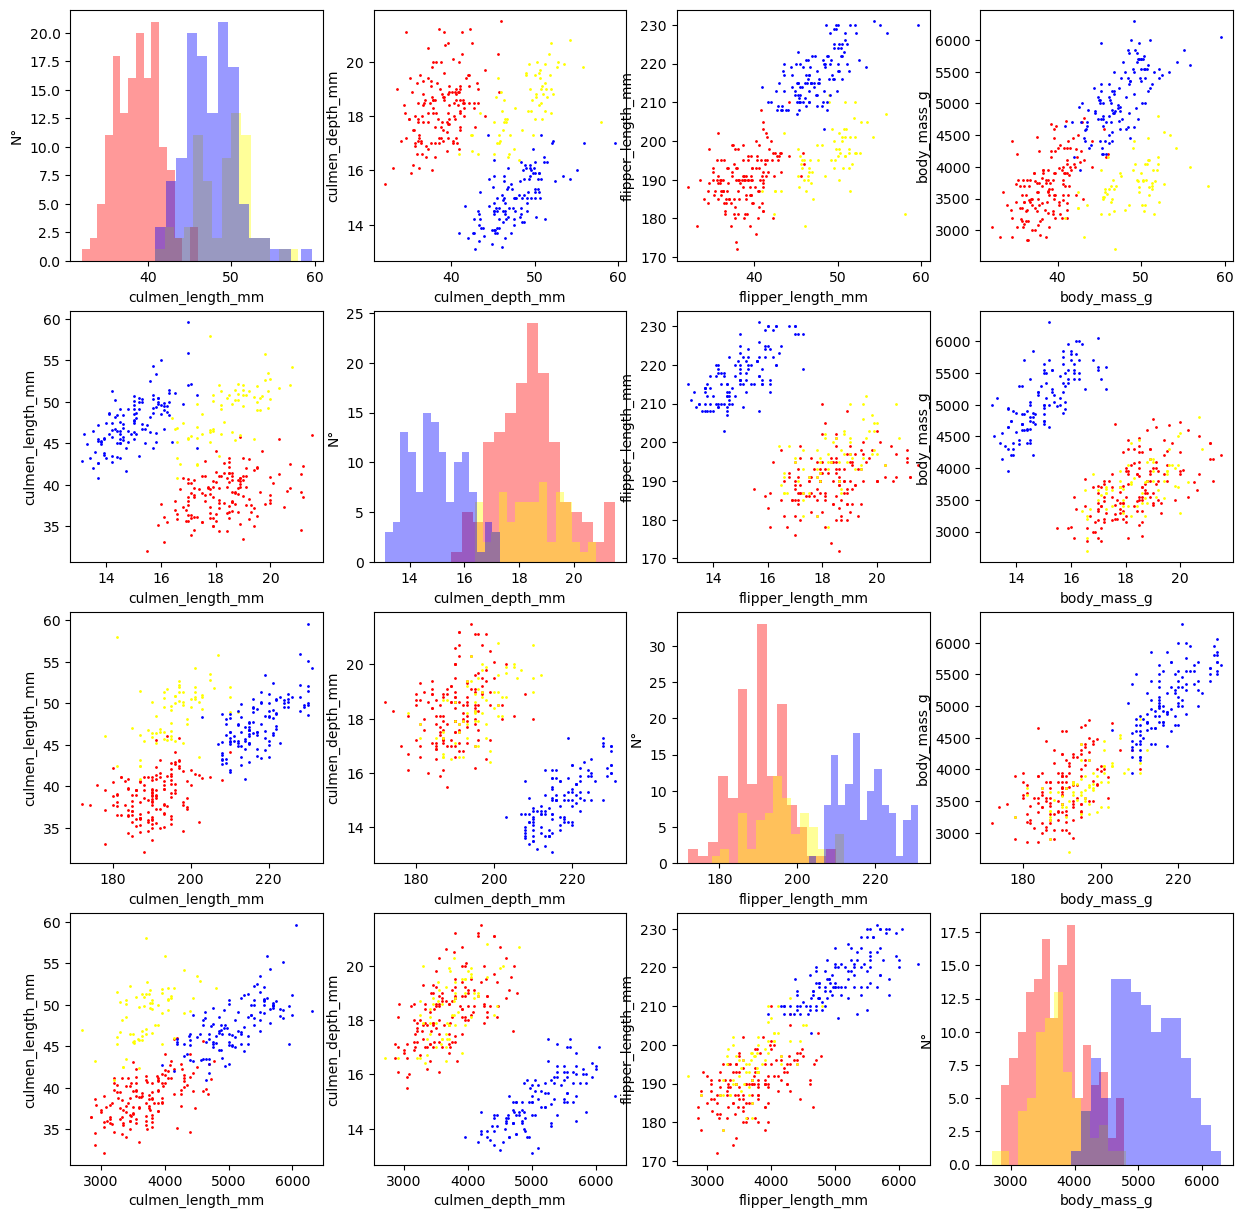

In [37]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
for i, f_i in enumerate(features):
    for j, f_j in enumerate(features):
        if i != j:
            for sp in species_color:
                filt = useful_data["species"]==sp #seleziono la specie
                axs[i, j].scatter(useful_data[filt][f_i], useful_data[filt][f_j], s=1, c=species_color[sp])
                axs[i, j].set_xlabel(f_j)
                axs[i, j].set_ylabel(f_j)
        else: 
            for sp in species_color:
                filt = useful_data["species"]==sp #seleziono la specie
                axs[i, j].hist(useful_data[filt][f_i], bins=15, color=species_color[sp], alpha=0.4)    
                
            axs[i, j].set_xlabel(f_i)
            axs[i, j].set_ylabel("N°")
plt.show()

#### Suddivisione dei dati in training set e test set

In [38]:
from sklearn.model_selection import train_test_split

In [42]:
X = useful_data[features] #dati in input: feature
y = useful_data[target] #variabile target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

Dovremmo fare la procedura di **normalizzaion**, amche detta **standardizzazione**, delle feature, per riportare i valori di tutte le feature entro un range comune, per esempio $\in[-1,1]$

La faremo successivamente...

#### Scelta del modello 

In [47]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(5,5))

#### Addestramento modello

In [70]:
model.fit(X_train, y_train)

c:\Users\lucaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

In [72]:
model.score(X_test, y_test) #accuratezza dice percentuale di pinguini che ha classificato correttamente

0.5445544554455446